# Capstone, Part II: Exploratory Data Analysis


## 1. Reading in the cleaned data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from scipy.stats import ttest_ind

%matplotlib inline
plt.style.use("ggplot")

In [2]:
path = "../enem2017/DADOS/pima.csv"
pima = pd.read_csv(path, encoding="latin1")
pd.set_option("max_rows", 150)     
pd.set_option("max_columns", 150)

## 2. Let's look at its basic characteristics


In [3]:
pima.head()

,student_id_num,city_of_residence,state_of_residence,age,sex,marital_status,race,nationality,birth_city_name,birth_state_initials,student_hs_grad_status,high_school_graduation_year,hs_type,for_fun?,pregnant?,requested_resource?,transgender?,did_ns_math?,did_hs_lang?,ns_score,hs_score,lc_score,math_score,for_language_choice,essay_gradable?,essay_score,dad_male_guardian_education,mom_female_guardian_education,male_occupation_class,female_occupation_class,number_of_housemates_include_student,family_monthly_income,domestic_worker?,home_has_bathroom?,home_wash_machine?,home_computer,home_has_internet?,income_avr,per_house_member_income,total_score
0,170003336360,Teresina,Piauí,30.0,M,Married,Mestizo,brazilian,Teresina,PI,finished,before_2007,no_response,"no,_student",0,0,0,Present,Present,674.8,682.7,626.4,795.0,English,all_good,780.0,college,high_school,skilled_white5,low_white4,3.0,18740+,Yes,Yes,Yes,3,Yes,18740.0,6246.666667,3558.9
1,170001671264,Balsas,Maranhão,25.0,M,Single,Mestizo,brazilian,Balsas,MA,finished,2010,no_response,"no,_student",0,0,0,Present,Present,473.5,594.0,371.1,439.9,English,all_good,560.0,completed_9th,high_school,skilled_blue3,skilled_blue3,3.0,937-1406,No,Yes,Yes,1,Yes,1171.5,390.500000,2438.5
2,170003333547,Santo Amaro do Maranhão,Maranhão,23.0,M,Single,Mestizo,brazilian,Primeira Cruz,MA,finished,2012,no_response,"no,_student",0,0,0,Absent,Absent,0.0,0.0,0.0,0.0,English,Missing,0.0,fifth_grade,high_school,farmer1,low_white4,7.0,0-937,No,Yes,Yes,1,Yes,468.5,66.928571,0.0
3,170001663653,São Luís,Maranhão,23.0,F,Single,White,brazilian,São Luís,MA,finished,2012,no_response,"no,_student",0,0,0,Present,Present,430.6,630.0,549.5,493.9,Spanish,all_good,780.0,fifth_grade,fifth_grade,skilled_blue3,low_white4,4.0,937-1406,No,Yes,No,1,Yes,1171.5,292.875000,2884.0
4,170001663735,Teresina,Piauí,20.0,F,Single,Black,brazilian,Teresina,PI,finished,2016,no_response,"no,_student",0,0,0,Absent,Present,0.0,496.6,544.5,0.0,Spanish,all_good,540.0,fifth_grade,high_school,skilled_blue3,unskilled_blue2,3.0,937-1406,No,Yes,No,0,No,1171.5,390.500000,1581.1


In [4]:
# https://guiadoestudante.abril.com.br/enem/como-funciona-nota-enem/


In [5]:
pima.shape

(435524, 40)

In [6]:
pima.dtypes

student_id_num                            int64
city_of_residence                        object
state_of_residence                       object
age                                     float64
sex                                      object
marital_status                           object
race                                     object
nationality                              object
birth_city_name                          object
birth_state_initials                     object
student_hs_grad_status                   object
high_school_graduation_year              object
hs_type                                  object
for_fun?                                 object
pregnant?                                 int64
requested_resource?                       int64
transgender?                              int64
did_ns_math?                             object
did_hs_lang?                             object
ns_score                                float64
hs_score                                

_The features are all in appropriate data types._

### Missing Values

In [7]:
pima.isnull().mean()

student_id_num                          0.0
city_of_residence                       0.0
state_of_residence                      0.0
age                                     0.0
sex                                     0.0
marital_status                          0.0
race                                    0.0
nationality                             0.0
birth_city_name                         0.0
birth_state_initials                    0.0
student_hs_grad_status                  0.0
high_school_graduation_year             0.0
hs_type                                 0.0
for_fun?                                0.0
pregnant?                               0.0
requested_resource?                     0.0
transgender?                            0.0
did_ns_math?                            0.0
did_hs_lang?                            0.0
ns_score                                0.0
hs_score                                0.0
lc_score                                0.0
math_score                      

_Having ensured that NaN values were filled in the Data Cleaning notebook, there are no unaccounted for missing values. They can found either as "0" or "Missing" depending on the variable._

### Scores 

In [8]:
pima["total_score"].describe()

count    435524.000000
mean       1747.433626
std        1139.023773
min           0.000000
25%           0.000000
50%        2247.100000
75%        2564.000000
max        4163.500000
Name: total_score, dtype: float64

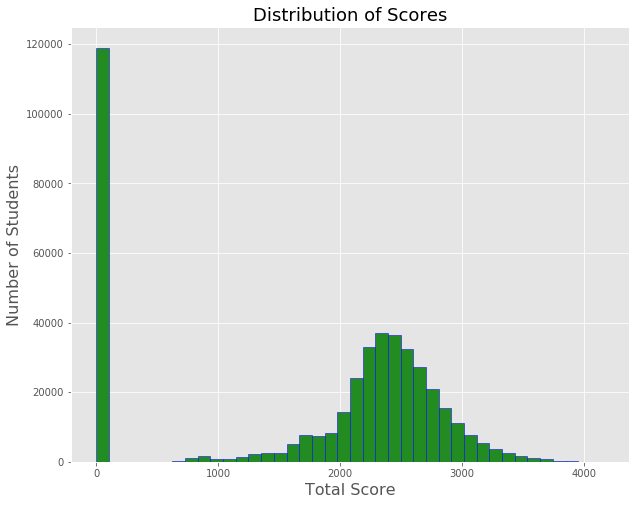

In [9]:
pima["total_score"].plot(kind="hist", bins=40, color="forestgreen", edgecolor="blue", figsize=(10,8))

plt.title("Distribution of Scores", size=18)
plt.ylabel("Number of Students", size=16)
plt.xticks(rotation=0)
plt.xlabel("Total Score", size=16); #issue!

_Clearly there is something going on as a significant amount of scores are 0.
Turns out, a lot of students don't actually show up for the exam, or only show up for one session._

#### In order to account for the absence,we have deleted incomplete exams from the main analysis. See the section below on students who missed one or both sessions to learn about the data and possible explanations.

## Understanding Missing Students

### i. How many students missed Session 1?

In [10]:
pima["did_ns_math?"].value_counts(normalize=True)
#The natural science and math portions are given on the same Sunday

Present    0.691957
Absent     0.307806
Missing    0.000236
Name: did_ns_math?, dtype: float64

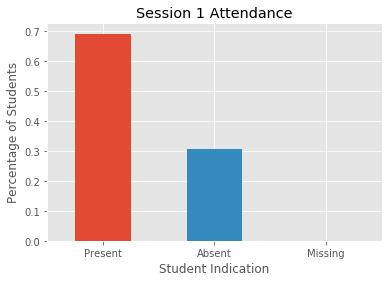

In [11]:
pima["did_ns_math?"].value_counts(normalize=True).plot(kind="bar")
plt.title("Session 1 Attendance")
plt.ylabel("Percentage of Students")
plt.xticks(rotation=0)
plt.xlabel("Student Indication");

### ii. How many students missed Session 2?

In [12]:
pima["did_hs_lang?"].value_counts(normalize=True)
#The human sciences and languag/code portions are given on the same Sunday

Present    0.725234
Absent     0.274407
Missing    0.000358
Name: did_hs_lang?, dtype: float64

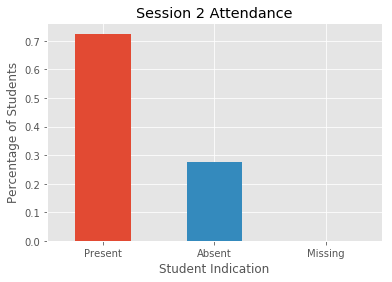

In [13]:
pima["did_hs_lang?"].value_counts(normalize=True).plot(kind="bar")
plt.title("Session 2 Attendance")
plt.ylabel("Percentage of Students")
plt.xticks(rotation=0)
plt.xlabel("Student Indication");

In [14]:
incomplete1 = ((pima["did_ns_math?"] == "Present") & (pima["did_hs_lang?"] == "Absent")) #Session 1 
incomplete2 = ((pima["did_ns_math?"] == "Absent") & (pima["did_hs_lang?"] == "Present")) #Session 2 
incomplete3 = ((pima["did_ns_math?"] == "Absent") & (pima["did_hs_lang?"] == "Absent")) #Both Sessions 1 & 2 

missing1 = pd.DataFrame(pima.loc[incomplete1, :])
missing2 = pd.DataFrame(pima.loc[incomplete2, :])
missing_both = pd.DataFrame(pima.loc[incomplete3, :])

### iii. Understanding students who missed both sessions.

In [15]:
missing_both["essay_gradable?"].value_counts()

Missing    118756
Name: essay_gradable?, dtype: int64

In [16]:
missing_both.count().head()

student_id_num        118756
city_of_residence     118756
state_of_residence    118756
age                   118756
sex                   118756
dtype: int64

### iv. Understanding students who missed only Session 1.

In [17]:
missing1.head()

,student_id_num,city_of_residence,state_of_residence,age,sex,marital_status,race,nationality,birth_city_name,birth_state_initials,student_hs_grad_status,high_school_graduation_year,hs_type,for_fun?,pregnant?,requested_resource?,transgender?,did_ns_math?,did_hs_lang?,ns_score,hs_score,lc_score,math_score,for_language_choice,essay_gradable?,essay_score,dad_male_guardian_education,mom_female_guardian_education,male_occupation_class,female_occupation_class,number_of_housemates_include_student,family_monthly_income,domestic_worker?,home_has_bathroom?,home_wash_machine?,home_computer,home_has_internet?,income_avr,per_house_member_income,total_score
97,170001664748,Teresina,Piauí,28.0,F,Single,Mestizo,brazilian,Teresina,PI,finished,2010,no_response,"no,_student",0,0,0,Present,Absent,460.0,0.0,0.0,578.1,Spanish,Missing,0.0,high_school,high_school,skilled_white5,don't_know,3.0,1406-1874,No,Yes,No,0,Yes,1640.0,546.666667,1038.1
337,170003336641,Teresina,Piauí,19.0,F,Single,Asian,brazilian,Teresina,PI,finishing_after_2017,no_response,no_response,"no,_student",0,0,0,Present,Absent,479.4,0.0,0.0,460.1,English,Missing,0.0,don't_know,college,don't_know,skilled_white5,7.0,2811-3748,Yes,Yes,Yes,1,Yes,3279.5,468.500000,939.5
543,170001663812,São Luís,Maranhão,21.0,F,Single,White,brazilian,Coroatá,MA,finished,2014,no_response,"no,_student",0,0,0,Present,Absent,482.7,0.0,0.0,518.1,English,Missing,0.0,between_5th_9th,completed_9th,skilled_blue3,unskilled_blue2,4.0,0-937,No,Yes,No,0,No,468.5,117.125000,1000.8
644,170001672658,São Luís,Maranhão,19.0,M,Single,Mestizo,brazilian,São Luís,MA,finished,2016,no_response,"no,_student",0,0,0,Present,Absent,464.2,0.0,0.0,534.8,English,Missing,0.0,high_school,high_school,skilled_blue3,unskilled_blue2,6.0,1406-1874,No,Yes,No,1,Yes,1640.0,273.333333,999.0
2008,170000020322,São Luís,Maranhão,32.0,M,Single,Mestizo,brazilian,Pinheiro,MA,finished,before_2007,no_response,"no,_student",0,0,0,Present,Absent,495.4,0.0,0.0,454.3,Spanish,Missing,0.0,completed_9th,completed_9th,farmer1,skilled_blue3,1.0,937-1406,No,Yes,No,0,Yes,1171.5,1171.500000,949.7


In [18]:
missing1.shape

(755, 40)

In [19]:
missing2.shape

(15192, 40)

In [20]:
missing_both.shape

(118756, 40)

In [21]:
missing2.head()

,student_id_num,city_of_residence,state_of_residence,age,sex,marital_status,race,nationality,birth_city_name,birth_state_initials,student_hs_grad_status,high_school_graduation_year,hs_type,for_fun?,pregnant?,requested_resource?,transgender?,did_ns_math?,did_hs_lang?,ns_score,hs_score,lc_score,math_score,for_language_choice,essay_gradable?,essay_score,dad_male_guardian_education,mom_female_guardian_education,male_occupation_class,female_occupation_class,number_of_housemates_include_student,family_monthly_income,domestic_worker?,home_has_bathroom?,home_wash_machine?,home_computer,home_has_internet?,income_avr,per_house_member_income,total_score
4,170001663735,Teresina,Piauí,20.0,F,Single,Black,brazilian,Teresina,PI,finished,2016,no_response,"no,_student",0,0,0,Absent,Present,0.0,496.6,544.5,0.0,Spanish,all_good,540.0,fifth_grade,high_school,skilled_blue3,unskilled_blue2,3.0,937-1406,No,Yes,No,0,No,1171.5,390.5,1581.1
158,170003335430,Alto Longá,Piauí,17.0,M,Single,Mestizo,brazilian,Teresina,PI,finished,2016,no_response,"no,_student",0,0,0,Absent,Present,0.0,456.3,393.7,0.0,Spanish,all_good,600.0,completed_9th,completed_9th,don't_know,don't_know,3.0,937-1406,No,Yes,Yes,1,Yes,1171.5,390.5,1450.0
163,170003334023,Timon,Maranhão,22.0,F,Missing,no_response,brazilian,Açailândia,MA,finished,2014,no_response,"no,_student",0,0,0,Absent,Present,0.0,476.5,543.4,0.0,English,all_good,620.0,high_school,high_school,skilled_blue3,skilled_blue3,6.0,no_response,No,Yes,No,1,No,0.0,0.0,1639.9
169,170003350423,São Luís,Maranhão,29.0,F,Single,White,brazilian,São Luís,MA,finished,before_2007,no_response,"no,_student",0,0,0,Absent,Present,0.0,624.9,602.8,0.0,English,all_good,500.0,high_school,high_school,low_white4,skilled_blue3,5.0,5622-6559,No,Yes,Yes,1,Yes,6090.5,1218.1,1727.7
179,170001666504,Teresina,Piauí,29.0,F,Single,Mestizo,brazilian,Teresina,PI,finished,2007,no_response,"no,_student",0,0,0,Absent,Present,0.0,507.2,555.7,0.0,English,all_good,600.0,fifth_grade,high_school,skilled_blue3,unskilled_blue2,5.0,937-1406,No,Yes,No,1,Yes,1171.5,234.3,1662.9


### v. Missing Student Conclusions

For our analyses, we will only look at valid score results, and so have created a filtered dataframe.

In [22]:
not_missing =((pima["ns_score"] != 0) & (pima["hs_score"] != 0) & (pima["lc_score"] != 0) & (pima["math_score"] != 0))

valid_pima = pima[not_missing]

In [23]:
valid_pima.count().head()

student_id_num        300176
city_of_residence     300176
state_of_residence    300176
age                   300176
sex                   300176
dtype: int64

## 3. Valid Data EDA

### A. Scores

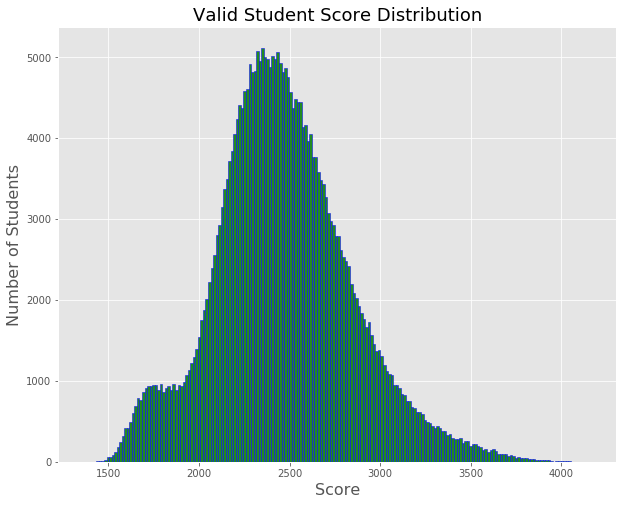

In [24]:
valid_pima["total_score"].plot(kind="hist", bins=200, color="forestgreen", edgecolor="blue", figsize=(10,8))
plt.ylabel("Number of Students", size=16)
plt.xticks(rotation=0)
plt.xlabel("Score", size=16)
plt.title("Valid Student Score Distribution", size=18);
 #set values between 1500 and 2000  -figure out hat determines variance 

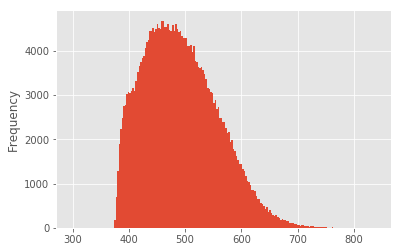

In [25]:
valid_pima["ns_score"].plot(kind="hist", bins=200);

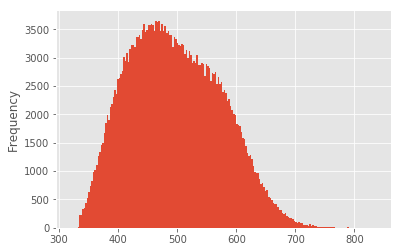

In [26]:
valid_pima["hs_score"].plot(kind="hist", bins=200);

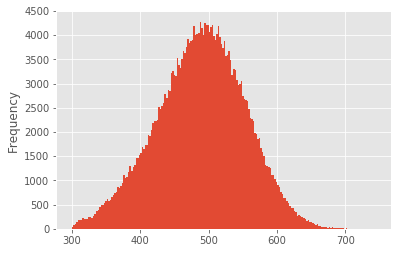

In [27]:
valid_pima["lc_score"].plot(kind="hist", bins=200);

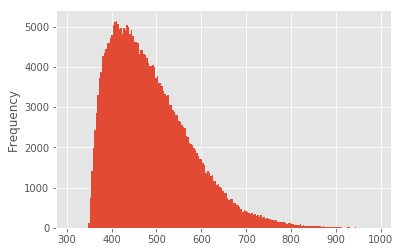

In [28]:
valid_pima["math_score"].plot(kind="hist", bins=200);

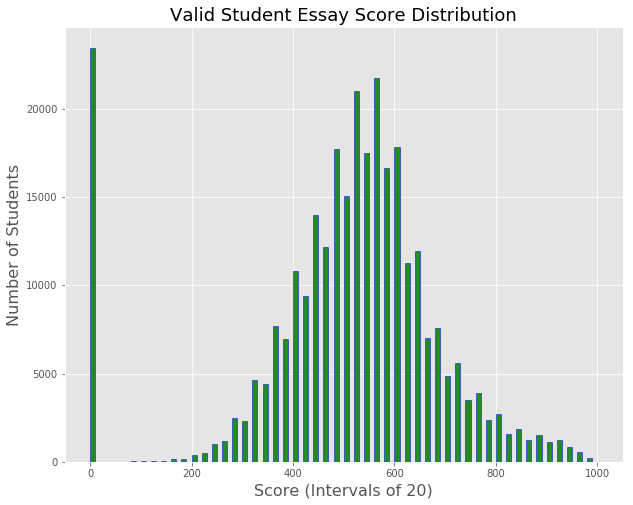

In [29]:
valid_pima["essay_score"].plot(kind="hist", bins=100, color="forestgreen", edgecolor="blue", figsize=(10,8))
plt.ylabel("Number of Students", size=16)
plt.xticks(rotation=0)
plt.xlabel("Score (Intervals of 20)", size=16)
plt.title("Valid Student Essay Score Distribution", size=18);

In [30]:
valid_pima["essay_gradable?"].value_counts()

all_good                     276722
doesn't_respond_to_prompt     19862
blank                          1306
not_enough_text                1122
disconnected_part               475
copy of prompt                  397
no_attention_to_type            220
nullified                        72
Name: essay_gradable?, dtype: int64

In [31]:
3592/300176

0.011966313096316827

_Even after removing the incomplete scores, it seems that many students still got a zero on the essay portion. Since the essay is scored differently than the other sections, we will separate it from the combined score, what we are designating as the sum of the four area section scores._

In [32]:
valid_pima["combined_score"] = (valid_pima["ns_score"] + valid_pima["hs_score"] + valid_pima["lc_score"] + valid_pima["math_score"])

C:\Users\602770\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


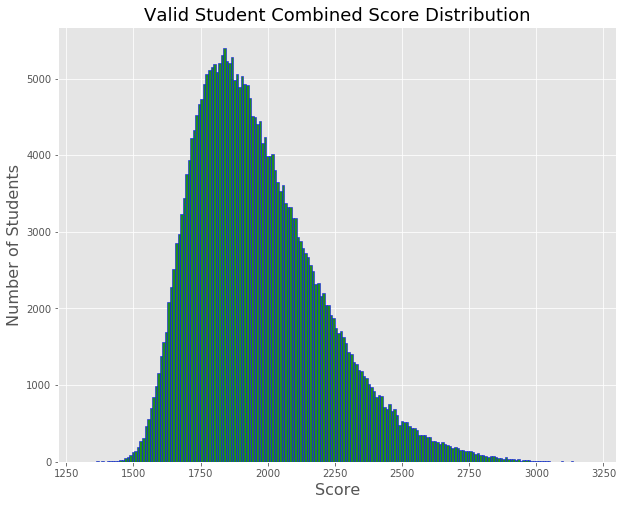

In [33]:
valid_pima["combined_score"].plot(kind="hist", bins=200, color="forestgreen", figsize=(10,8), edgecolor="blue")
plt.ylabel("Number of Students", size=16)
plt.xlabel("Score", size=16)
plt.xticks(rotation=0)
plt.title("Valid Student Combined Score Distribution", size=18);

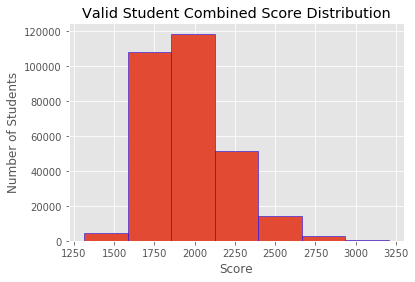

In [34]:
valid_pima["combined_score"].plot(kind="hist", bins=7, edgecolor="blue")
plt.ylabel("Number of Students", size=12)
plt.xlabel("Score")
plt.xticks(rotation=0)
plt.title("Valid Student Combined Score Distribution");

_This looks a lot more normal for a distribution of scores._

### B. Student Demographics

#### 1. Age

In [35]:
valid_pima["age"].describe()

count    300176.000000
mean         21.996835
std           6.985986
min           0.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          79.000000
Name: age, dtype: float64

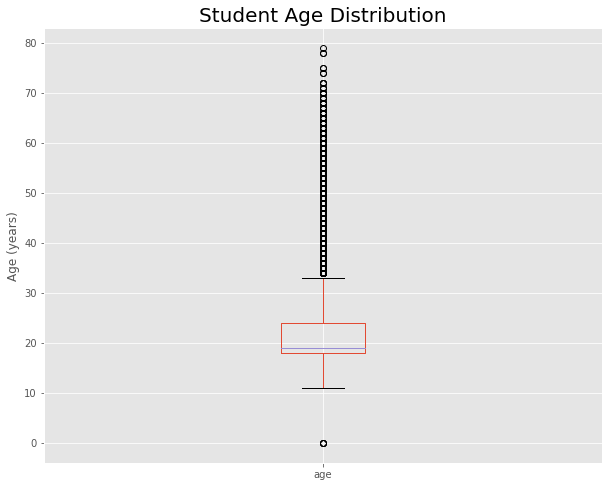

In [36]:
valid_pima["age"].plot(kind="box", figsize=(10,8))

plt.ylabel("Age (years)", size=12)
plt.title("Student Age Distribution", size=20);

### 2. Sex

In [37]:
valid_pima["sex"].value_counts(normalize=True)

F    0.59701
M    0.40299
Name: sex, dtype: float64

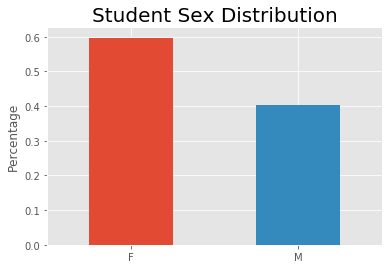

In [38]:
valid_pima["sex"].value_counts(normalize=True).plot(kind="bar" );

plt.ylabel("Percentage", size=12)
plt.xticks(rotation=0)
plt.title("Student Sex Distribution", size=20);

In [39]:
valid_pima["transgender?"].value_counts()

0    300169
1         7
Name: transgender?, dtype: int64

### 3. Cities of Residence

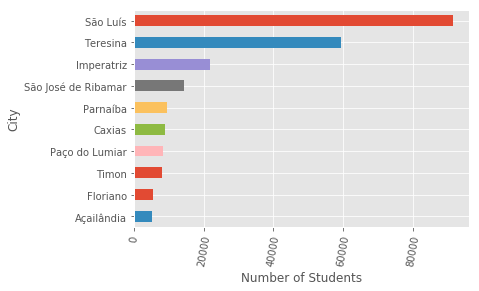

In [40]:
graph = pima["city_of_residence"].value_counts().head(10).plot(kind="barh")
plt.ylabel("City")
plt.xlabel("Number of Students")
plt.xticks(rotation=80);
graph.invert_yaxis()

### 4. Marital Status

In [41]:
valid_pima["marital_status"].value_counts(normalize=True)

Single       0.887269
Married      0.076249
Missing      0.027417
Divorced     0.008039
Widow(er)    0.001026
Name: marital_status, dtype: float64

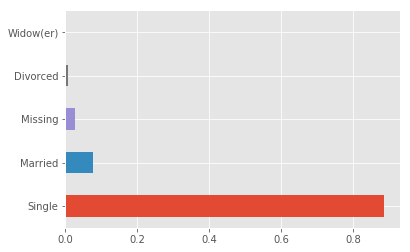

In [42]:
valid_pima["marital_status"].value_counts(normalize=True).plot(kind="barh");

### 5. Student Origin

In [43]:
valid_pima["birth_state_initials"].value_counts(normalize=True).head(10)

MA         0.584091
PI         0.316451
Missing    0.037158
SP         0.014565
PA         0.012939
DF         0.007795
CE         0.005314
TO         0.003241
RJ         0.002755
PE         0.002712
Name: birth_state_initials, dtype: float64

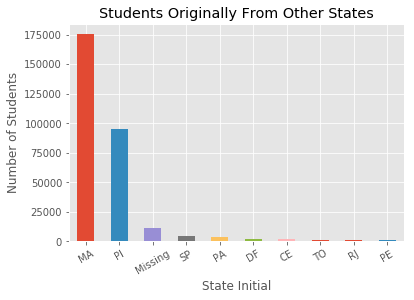

In [44]:
valid_pima["birth_state_initials"].value_counts().head(10).plot(kind="bar")

plt.title("Students Originally From Other States")
plt.xlabel("State Initial")
plt.xticks(rotation=30)
plt.ylabel("Number of Students");

In [45]:
valid_pima["nationality"].value_counts(normalize=True)

brazilian             0.962842
naturalized           0.034693
native_born_abroad    0.001602
foreigner             0.000476
no_response           0.000386
Name: nationality, dtype: float64

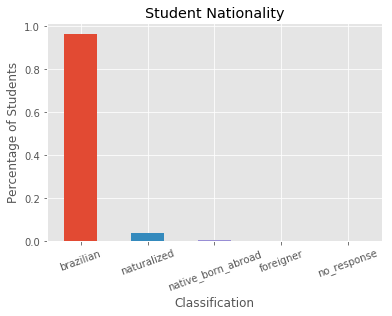

In [46]:
valid_pima["nationality"].value_counts(normalize=True).plot(kind="bar")

plt.title("Student Nationality")
plt.xlabel("Classification")
plt.xticks(rotation=20)
plt.ylabel("Percentage of Students");

#How to scale graph 

### 6. Ethnicities/Race

In [47]:
valid_pima["race"].value_counts(normalize=True)

Mestizo        0.631480
White          0.181720
Black          0.148819
Asian          0.020971
no_response    0.013182
Native         0.003828
Name: race, dtype: float64

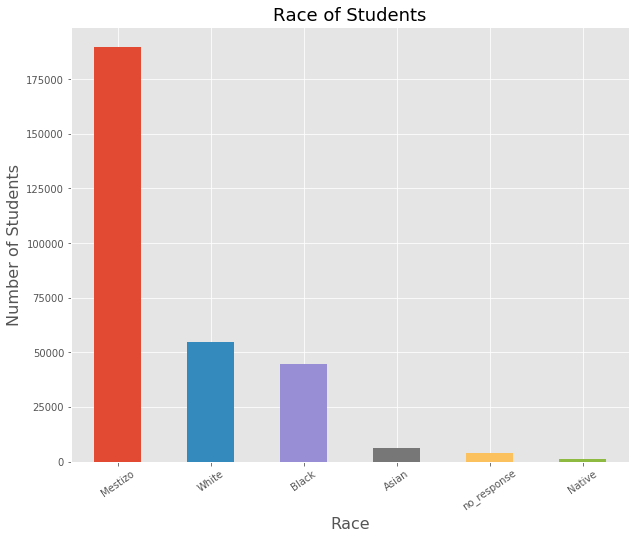

In [48]:
valid_pima["race"].value_counts().plot(kind="bar", figsize=(10,8))
plt.title("Race of Students", size=18)
plt.xlabel("Race", size=16)
plt.ylabel("Number of Students", size=16)
plt.xticks(rotation=35);

### 7. Graduation Year

In [49]:
valid_pima["high_school_graduation_year"].value_counts(normalize=True)

no_response    0.382023
2016           0.142237
before_2007    0.100974
2015           0.100291
2014           0.068200
2013           0.049411
2012           0.038884
2011           0.030795
2010           0.027461
2009           0.023066
2008           0.018982
2007           0.017676
Name: high_school_graduation_year, dtype: float64

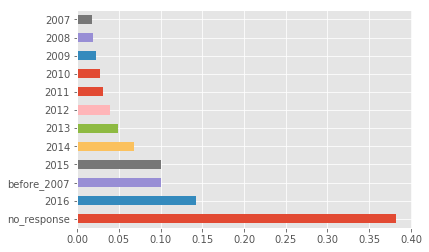

In [50]:
valid_pima["high_school_graduation_year"].value_counts(normalize=True).plot(kind="barh");

### 8. School Type of Students 

In [51]:
valid_pima["hs_type"].value_counts(normalize=True)

no_response    0.735345
public         0.229435
private        0.034910
foreign        0.000310
Name: hs_type, dtype: float64

_The fact that over three quarters of students are not responding to questions regarding their schools may indicate the concern over the influence that coming from a public vs. private school has on admission. Ultimately though, students need to prove their identity and education before matriculating to a university program, so there is no concern with the response rate on this question._

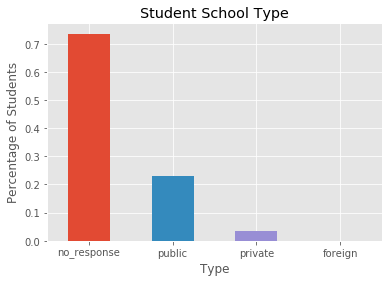

In [52]:
valid_pima["hs_type"].value_counts(normalize=True).plot(kind="bar")
plt.title("Student School Type")
plt.xlabel("Type")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Students");


###  9. Alternative Purpose for Taking ENEM

In [53]:
valid_pima["for_fun?"].value_counts(normalize=True)

no,_student        0.900382
yes_not_student    0.099618
Name: for_fun?, dtype: float64

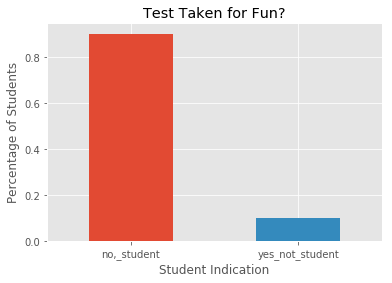

In [54]:
valid_pima["for_fun?"].value_counts(normalize=True).plot(kind="bar")
plt.title("Test Taken for Fun?")
plt.ylabel("Percentage of Students")
plt.xticks(rotation=0)
plt.xlabel("Student Indication");

## C. Student Family & Home Life Characteristics

### 12. Internet Access

In [55]:
valid_pima["home_has_internet?"].value_counts(normalize=True)

No     0.566947
Yes    0.433053
Name: home_has_internet?, dtype: float64

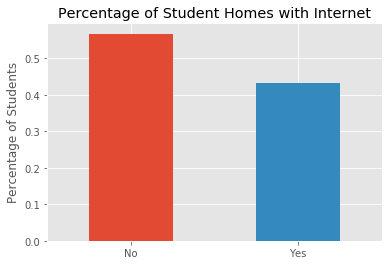

In [56]:
valid_pima["home_has_internet?"].value_counts(normalize=True).plot(kind="bar")
plt.title("Percentage of Student Homes with Internet")
plt.ylabel("Percentage of Students")
plt.xticks(rotation=0);

### 13. Home Conditions

In [57]:
valid_pima["home_has_bathroom?"].value_counts(normalize=True)

Yes    0.963375
No     0.036625
Name: home_has_bathroom?, dtype: float64

_So 3.7% (need number) of students taking the exam do not have a bathroom in their house. This is low, but not low enough._

In [58]:
valid_pima["home_computer"].value_counts(normalize=True)

0    0.625157
1    0.326722
2    0.035926
3    0.009125
4    0.003072
Name: home_computer, dtype: float64

_So 62.5% of students do not have a computer at home._

In [59]:
valid_pima["home_wash_machine?"].value_counts(normalize=True)

No     0.725381
Yes    0.274619
Name: home_wash_machine?, dtype: float64

_72.5% of students don't have a washing machine._

### 14. Parental Education

In [60]:
valid_pima["dad_male_guardian_education"].value_counts(normalize=True)

fifth_grade        0.255640
high_school        0.219575
between_5th_9th    0.142919
completed_9th      0.117624
don't_know         0.104089
no_education       0.094071
college            0.040903
graduate_degree    0.025179
Name: dad_male_guardian_education, dtype: float64

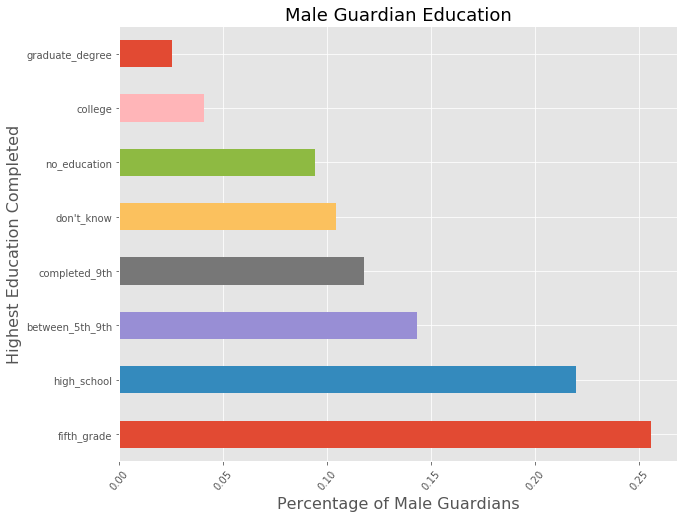

In [61]:
valid_pima["dad_male_guardian_education"].value_counts(normalize=True).plot(kind="barh", figsize=(10,8))
plt.title("Male Guardian Education", size=18)
plt.xlabel("Percentage of Male Guardians", size=16)
plt.xticks(rotation=50)
plt.ylabel("Highest Education Completed", size=16);

In [62]:
valid_pima["mom_female_guardian_education"].value_counts(normalize=True)

high_school        0.303712
fifth_grade        0.186591
completed_9th      0.141597
between_5th_9th    0.135890
college            0.072391
no_education       0.061437
graduate_degree    0.059385
don't_know         0.038997
Name: mom_female_guardian_education, dtype: float64

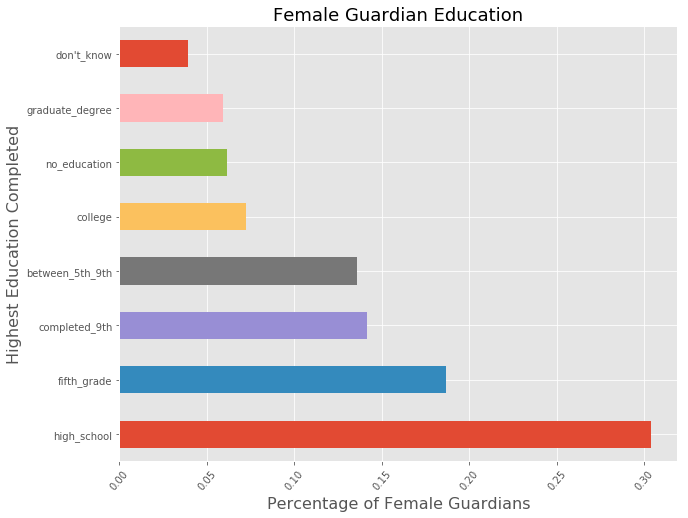

In [63]:
valid_pima["mom_female_guardian_education"].value_counts(normalize=True).plot(kind="barh", figsize=(10,8))
plt.title("Female Guardian Education", size=18)
plt.xlabel("Percentage of Female Guardians", size=16)
plt.xticks(rotation=50)
plt.ylabel("Highest Education Completed", size=16);

### 15. Socioeconomic Status

In [64]:
valid_pima["family_monthly_income"].value_counts(normalize=True)

0-937          0.442687
937-1406       0.219068
no_response    0.083631
1406-1874      0.078361
1874-2343      0.047432
2811-3748      0.030162
2343-2811      0.028620
3748-4685      0.020145
4685-5622      0.014375
5622-6559      0.008678
6559-7496      0.005097
9730-11244     0.004604
7496-8433      0.004018
18740+         0.003858
8433-9370      0.003348
11244-14055    0.003225
14055-18740    0.002692
Name: family_monthly_income, dtype: float64

_So 44.3% of students have a family income that is at or below one minimum salary._ 

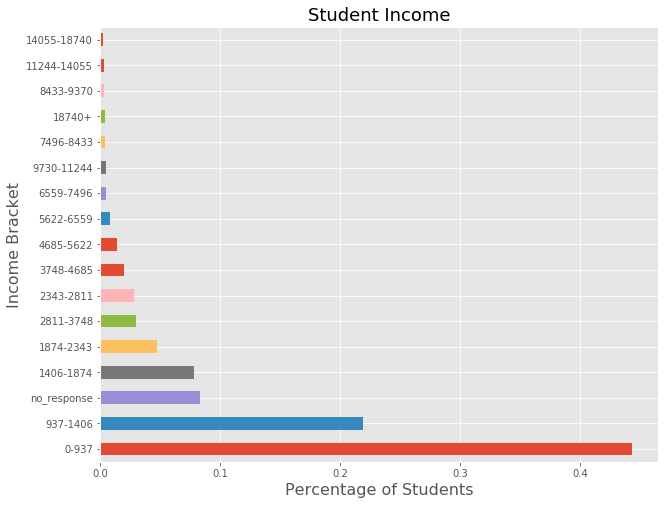

In [65]:
valid_pima["family_monthly_income"].value_counts(normalize=True).plot(kind="barh", figsize=(10,8))
plt.title("Student Income", size=18)
plt.xlabel("Percentage of Students", size=16)
plt.ylabel("Income Bracket", size=16);

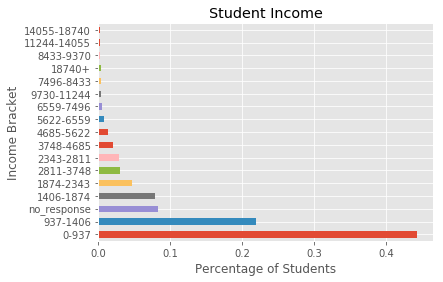

In [66]:
valid_pima["family_monthly_income"].value_counts(normalize=True).plot(kind="barh")
plt.title("Student Income")
plt.xlabel("Percentage of Students")
plt.ylabel("Income Bracket");

### C. Feature Influence on Score Results


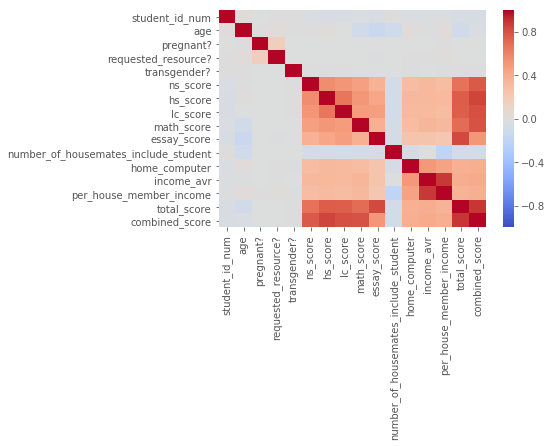

In [67]:
sns.heatmap(valid_pima.corr(), cmap="coolwarm", vmin=-1);

_Looks like there isn't much correlation between any of the variables. Let's take a closer look.
It should also be noted that for many of the comparisons, hypothesis tests can be conducted to see if the differences are statistically significant or not. There was not enough time to do so in the current analysis._

In [68]:
valid_pima.groupby("nationality")["age", "ns_score", "hs_score", "lc_score", "math_score", "essay_score"].describe()

age                                               \
                       count       mean       std   min   25%   50%   75%   
nationality                                                                 
brazilian           289022.0  22.020469  7.001824   0.0  18.0  19.0  24.0   
foreigner              143.0  22.209790  7.829030  15.0  17.0  20.0  24.0   
native_born_abroad     481.0  23.690229  8.756527  14.0  18.0  20.0  26.0   
naturalized          10414.0  21.274150  6.383863  13.0  18.0  19.0  22.0   
no_response            116.0  20.706897  5.335716  15.0  17.0  19.0  22.0   

                          ns_score                                        \
                     max     count        mean        std    min     25%   
nationality                                                                
brazilian           79.0  289022.0  492.585693  65.933103  298.2  441.20   
foreigner           63.0     143.0  489.360839  66.541507  378.8  430.70   
native_born_abroad  64.0     481.0  485.308940  64.747934  380.9  433.30   
naturalized         72.0   10414.0  478.315978  56.595202  330.4  434.90   
no_response         51.0     116.0  480.284483  57.617879  380.0  442.65   

                                         hs_score                         \
                      50%    75%    max     count        mean        std   
nationality                                                                
brazilian           486.3  537.1  839.2  289022.0  496.931936  77.999273   
foreigner           485.6  542.0  638.7     143.0  500.814685  79.759384   
native_born_abroad  475.1  526.3  732.5     481.0  487.457173  75.696212   
naturalized         473.1  516.8  739.5   10414.0  477.928356  66.384302   
no_response         477.3  523.3  624.5     116.0  485.300000  64.071721   

                                                          lc_score  \
                      min     25%    50%      75%    max     count   
nationality                                                          
brazilian           321.4  435.90  491.3  555.000  836.6  289022.0   
foreigner           362.1  435.60  494.3  555.200  683.2     143.0   
native_born_abroad  335.2  427.10  481.3  539.100  724.6     481.0   
naturalized         334.7  427.40  472.9  526.700  735.4   10414.0   
no_response         341.4  438.85  474.2  532.425  647.9     116.0   

                                                                          \
                          mean        std    min      25%    50%     75%   
nationality                                                                
brazilian           488.735383  64.642760  299.6  446.100  491.2  533.70   
foreigner           484.438462  64.967359  338.5  436.500  491.0  529.55   
native_born_abroad  483.683784  60.944240  317.2  444.500  486.1  525.80   
naturalized         475.301335  55.738343  299.6  439.325  479.0  514.50   
no_response         474.190517  63.681815  316.9  434.750  480.6  513.10   

                          math_score                                         \
                      max      count        mean        std    min      25%   
nationality                                                                   
brazilian           744.8   289022.0  489.007431  91.555341  310.8  417.900   
foreigner           607.2      143.0  489.604895  89.837659  353.5  425.200   
native_born_abroad  659.8      481.0  474.254262  91.391790  353.3  405.900   
naturalized         668.2    10414.0  469.665681  74.273691  324.9  411.500   
no_response         626.2      116.0  467.089655  76.535229  359.0  406.675   

                                          essay_score                          \
                      50%      75%    max       count        mean         std   
nationality                                                                     
brazilian           471.8  542.400  989.0    289022.0  499.914955  192.953031   
foreigner           469.8  534.650  862.2       143.0  481.9580

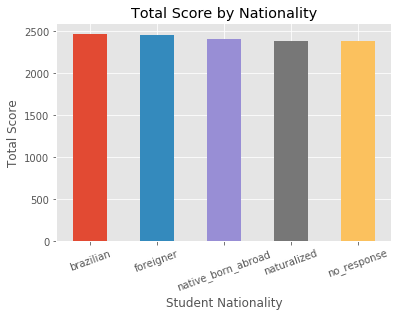

In [69]:
valid_pima.groupby("nationality")["total_score"].mean().plot(kind="bar")
plt.title("Total Score by Nationality")
plt.xlabel("Student Nationality")
plt.xticks(rotation=20)
plt.ylabel("Total Score");

_This shows that there was little variation among scores between the various nationality classifications, although foreigners tended to have slightly lower scores than native Brazilians._

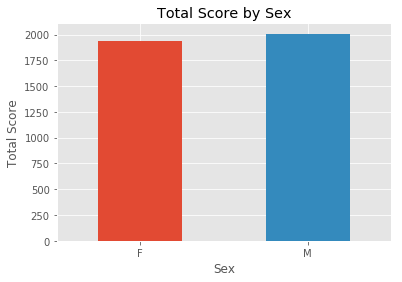

In [70]:
valid_pima.groupby("sex")["combined_score"].mean().plot(kind="bar")
plt.title("Total Score by Sex")
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.ylabel("Total Score");

_Male students had higher average test scores than female students.
There are many more females taking the ENEM exam than males, about 60% to 40%._

In [71]:
valid_pima.groupby("city_of_residence")["combined_score"].describe().sort_values(by="mean", ascending=False).head(10) #Best Overall

,count,mean,std,min,25%,50%,75%,max
city_of_residence,,,,,,,,
Cocal dos Alves,92.0,2219.578261,242.735037,1565.7,2067.300,2199.00,2391.300,2791.5
Teresina,40815.0,2060.610815,283.262009,1314.6,1846.650,2014.40,2229.850,3203.5
Francisco Santos,227.0,2040.881057,277.303777,1502.9,1831.750,2010.60,2218.050,2752.3
Imperatriz,15284.0,2017.978965,243.682154,1380.8,1834.175,1986.55,2172.425,3095.0
Santo Antônio de Lisboa,203.0,2013.094089,261.772101,1479.2,1827.700,1944.40,2143.350,2882.9
Caldeirão Grande do Piauí,53.0,2010.254717,237.474378,1619.3,1812.000,1989.30,2199.600,2556.0
São Luís,61932.0,2008.538725,245.341650,1370.4,1825.100,1973.30,2157.400,3188.8
Cocal,389.0,2005.326478,229.488338,1528.4,1827.900,1987.90,2171.000,2634.9
Dom Pedro,481.0,1999.546985,227.298284,1424.0,1835.600,1980.20,2139.500,2925.5


_Ten Cities with highest mean combined score._

In [72]:
valid_pima.groupby("city_of_residence")["combined_score"].describe().sort_values(by="mean").head(10) #Worst Overall

,count,mean,std,min,25%,50%,75%,max
city_of_residence,,,,,,,,
Matões do Norte,112.0,1796.353571,151.790001,1483.6,1696.725,1769.85,1884.175,2276.3
Lagoa Grande do Maranhão,107.0,1800.010280,161.760003,1497.6,1688.600,1771.90,1878.900,2280.1
Altamira do Maranhão,100.0,1803.821000,160.449918,1520.0,1697.725,1784.55,1862.125,2374.5
Pedro Laurentino,44.0,1806.815909,169.187613,1547.0,1675.700,1755.15,1946.525,2140.1
Cachoeira Grande,140.0,1807.752857,175.952509,1486.2,1681.325,1762.60,1909.450,2364.2
Antônio Almeida,54.0,1809.020370,182.354852,1553.5,1695.200,1765.40,1864.825,2366.6
Belágua,107.0,1809.079439,154.692669,1540.5,1716.350,1778.20,1876.250,2274.0
Monte Alegre do Piauí,203.0,1812.894089,170.495839,1475.9,1691.150,1801.40,1890.950,2838.2
Canavieira,30.0,1813.553333,162.473042,1577.7,1690.875,1785.45,1931.175,2168.4


_Ten Cities with lowest mean combined score._

In [73]:
valid_pima.groupby("city_of_residence")["ns_score"].describe().sort_values(by="mean", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
city_of_residence,,,,,,,,
Cocal dos Alves,92.0,551.523913,62.864206,387.6,520.275,563.55,599.425,665.2
Teresina,40815.0,510.744116,74.392312,298.2,452.700,504.30,561.450,839.2
Imperatriz,15284.0,504.746748,68.182704,298.3,450.875,500.05,553.500,816.1
Landri Sales,71.0,504.098592,71.698915,381.2,453.750,492.60,557.800,644.3
São José do Divino,108.0,500.900000,55.707371,379.8,457.950,504.50,540.300,642.7
Cocal,389.0,500.874807,64.993839,385.2,446.800,496.10,549.600,679.2
Francisco Santos,227.0,500.670485,72.213228,378.4,446.800,495.50,555.750,714.2
Parnaíba,6998.0,500.507859,67.555490,323.6,448.100,494.60,547.900,778.3
São Luís,61932.0,500.135357,67.022721,303.3,447.900,494.30,546.900,771.0


_Example of best 10 cities by average Natural Science score. Interesting to see the smaller cities that have very good average scores._ 

In [74]:
valid_pima.groupby("city_of_residence")["ns_score"].describe().sort_values(by="mean", ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
city_of_residence,,,,,,,,
Passagem Franca do Piauí,45.0,444.768889,44.001197,387.1,405.100,432.40,464.800,545.3
Pedro Laurentino,44.0,450.927273,46.751408,382.8,412.025,438.15,483.575,554.4
Matões do Norte,112.0,454.410714,52.595977,377.6,411.650,447.40,484.600,587.9
Curral Novo do Piauí,37.0,458.367568,52.024028,385.6,412.800,452.50,496.600,580.4
Lagoa Grande do Maranhão,107.0,458.659813,49.590384,377.7,418.850,457.20,489.700,600.0
Altamira do Maranhão,100.0,458.698000,50.884154,375.1,416.175,457.15,490.175,617.3
Sebastião Barros,82.0,459.331707,51.338095,377.6,419.250,442.05,504.225,577.2
Afonso Cunha,68.0,459.482353,47.956653,377.5,417.950,460.55,495.775,576.6
Nova Santa Rita,66.0,459.484848,54.409759,376.9,413.825,452.20,497.750,607.5


_And on the flipside, the 10 worst-performing cities by Natural Science score.
It would interesting to know schools are federal, state, and locally run, and whether they are public or private._

In [75]:
valid_pima.loc[:,["age", "ns_score", "hs_score", "lc_score", "math_score", "essay_score", "combined_score"]].describe()

,age,ns_score,hs_score,lc_score,math_score,essay_score,combined_score
count,300176.000000,300176.000000,300176.000000,300176.000000,300176.000000,300176.000000,300176.000000
mean,21.996835,492.072684,496.254817,488.253553,488.304582,499.191874,1964.885636
std,6.985986,65.679311,77.696276,64.395935,91.075309,192.834086,240.722247
min,0.000000,298.200000,321.400000,299.600000,310.800000,0.000000,1314.600000
25%,18.000000,440.900000,435.600000,445.800000,417.600000,420.000000,1786.300000
50%,19.000000,485.700000,490.500000,490.700000,471.200000,520.000000,1924.400000
75%,24.000000,536.300000,553.900000,532.900000,541.200000,600.000000,2104.800000
max,79.000000,839.200000,836.600000,744.800000,989.000000,1000.000000,3203.500000


_This is the overall average score, which could be used as a baseline to measure how decently a city is doing compared to the overall average._

In [76]:
valid_pima.groupby("state_of_residence")["age", "ns_score", "hs_score", "lc_score", 
                                         "math_score", "essay_score", "combined_score"].describe()

age                                              \
                       count       mean       std  min   25%   50%   75%   
state_of_residence                                                         
Maranhão            194994.0  21.904074  6.823627  0.0  18.0  19.0  24.0   
Piauí               105182.0  22.168803  7.274307  0.0  18.0  19.0  24.0   

                          ns_score                                       \
                     max     count        mean        std    min    25%   
state_of_residence                                                        
Maranhão            75.0  194994.0  490.159217  63.946089  298.3  440.3   
Piauí               79.0  105182.0  495.620006  68.636378  298.2  442.1   

                                          hs_score                        \
                       50%    75%    max     count       mean        std   
state_of_residence                                                         
Maranhão            484.10  533.7  816.1  194994.0  494.02265  76.224127   
Piauí               488.85  541.3  839.2  105182.0  500.39297  80.190305   

                                                       lc_score              \
                      min    25%    50%    75%    max     count        mean   
state_of_residence                                                            
Maranhão            325.5  434.5  488.6  550.8  836.6  194994.0  487.026659   
Piauí               321.4  437.5  494.6  559.9  815.3  105182.0  490.528059   

                                                                 math_score  \
                          std    min    25%    50%    75%    max      count   
state_of_residence                                                            
Maranhão            63.664914  299.6  445.3  490.1  531.4  744.8   194994.0   
Piauí               65.669347  299.6  446.6  491.9  536.1  737.1   105182.0   

                                                                              \
                          mean        std    min    25%    50%    75%    max   
state_of_residence                                                             
Maranhão            484.000095  86.583543  310.8  416.2  468.4  535.8  975.8   
Piauí               496.284552  98.367476  326.9  420.5  476.8  551.9  989.0   

                   essay_score                                             \
                         count        mean         std  min    25%    50%   
state_of_residence                                                          
Maranhão              194994.0  491.654615  193.664930  0.0  420.0  520.0   
Piauí                 105182.0  513.164990  190.497899  0.0  440.0  540.0   

                                  combined_score                           \
                      75%     max          count         mean         std   
state_of_residence                                                          
Maranhão            600.0   980.0       194994.0  1955.208621  230.625552   
Piauí               620.0  1000.0       105182.0  1982.825587  257.439350   

                                                            
                       min     25%     50%     75%     max  
state_of_residence                                          
Maranhão            1362.3  1783.7  1918.7  2092.6  3188.8  
Piauí               1314.6  1791.6  1935.7  2129.4  3203.5

_This shows us that in every category, Piauí has a slightly higher average score in every aspect of the exam._

In [77]:
valid_pima.groupby("dad_male_guardian_education")["combined_score"].describe().sort_values(by="mean", ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
dad_male_guardian_education,,,,,,,,
graduate_degree,7558.0,2227.053175,316.890993,1425.5,1982.025,2217.45,2457.175,3203.5
college,12278.0,2177.042393,296.232898,1314.6,1947.450,2159.55,2386.075,3188.8
high_school,65911.0,2032.057204,252.823006,1363.7,1840.900,2000.50,2192.300,3149.1
completed_9th,35308.0,1970.481854,229.414775,1423.3,1799.100,1937.95,2109.800,3052.8
between_5th_9th,42901.0,1938.952950,217.826020,1407.4,1779.100,1905.40,2069.500,3069.7
don't_know,31245.0,1925.117366,212.612057,1368.8,1768.200,1893.70,2051.300,3133.4
fifth_grade,76737.0,1909.096465,201.532025,1362.3,1760.600,1880.40,2030.800,3028.3
no_education,28238.0,1873.694051,188.171562,1380.8,1736.525,1844.00,1984.100,3021.7


_Father/male guardian education level is a good indicator of student average combined score._

In [78]:
valid_pima.groupby("mom_female_guardian_education")["combined_score"].describe().sort_values(by="mean", 
            ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
mom_female_guardian_education,,,,,,,,
graduate_degree,17826.0,2144.316846,303.550166,1416.5,1907.225,2116.6,2354.100,3197.6
college,21730.0,2103.255030,285.363109,1403.3,1882.300,2072.7,2291.900,3203.5
high_school,91167.0,2001.346577,241.672968,1314.6,1819.700,1968.2,2153.200,3135.1
completed_9th,42504.0,1942.367492,215.077337,1366.8,1782.600,1912.4,2072.700,3069.7
between_5th_9th,40791.0,1917.698762,206.626572,1407.4,1765.700,1887.0,2041.600,3133.4
fifth_grade,56010.0,1895.017665,193.875410,1363.3,1752.500,1867.5,2012.175,3033.3
don't_know,11706.0,1889.069144,201.327512,1370.9,1744.500,1855.5,2000.800,3090.8
no_education,18442.0,1864.754501,183.557670,1380.8,1731.300,1837.4,1972.100,2805.7


In [79]:
valid_pima.groupby("family_monthly_income")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
family_monthly_income,,,,,,,,
18740+,1158.0,2431.736269,292.287607,1587.4,2234.425,2451.05,2643.925,3203.5
14055-18740,808.0,2409.178465,284.584160,1645.8,2215.450,2420.90,2621.675,3188.8
11244-14055,968.0,2374.070558,297.626158,1561.2,2163.000,2379.80,2600.825,3123.0
9730-11244,1382.0,2353.176049,285.686248,1607.7,2154.150,2371.15,2559.800,3110.9
7496-8433,1206.0,2322.267164,293.814519,1551.6,2117.650,2325.70,2530.275,3176.1
8433-9370,1005.0,2320.780498,293.398980,1542.7,2119.300,2332.50,2525.700,3145.9
6559-7496,1530.0,2282.552614,287.736452,1485.9,2079.625,2293.30,2483.100,3179.4
5622-6559,2605.0,2254.478580,286.848721,1513.4,2042.100,2261.30,2455.200,3088.9
4685-5622,4315.0,2230.131866,279.154461,1314.6,2028.000,2230.70,2428.600,3135.2


In [80]:
valid_pima.groupby("family_monthly_income")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
family_monthly_income,,,,,,,,
18740+,1158.0,2431.736269,292.287607,1587.4,2234.425,2451.05,2643.925,3203.5
14055-18740,808.0,2409.178465,284.584160,1645.8,2215.450,2420.90,2621.675,3188.8
11244-14055,968.0,2374.070558,297.626158,1561.2,2163.000,2379.80,2600.825,3123.0
9730-11244,1382.0,2353.176049,285.686248,1607.7,2154.150,2371.15,2559.800,3110.9
7496-8433,1206.0,2322.267164,293.814519,1551.6,2117.650,2325.70,2530.275,3176.1
8433-9370,1005.0,2320.780498,293.398980,1542.7,2119.300,2332.50,2525.700,3145.9
6559-7496,1530.0,2282.552614,287.736452,1485.9,2079.625,2293.30,2483.100,3179.4
5622-6559,2605.0,2254.478580,286.848721,1513.4,2042.100,2261.30,2455.200,3088.9
4685-5622,4315.0,2230.131866,279.154461,1314.6,2028.000,2230.70,2428.600,3135.2


_Income is clearly influencing the student in a way that affects average score._

In [81]:
valid_pima.groupby("domestic_worker?")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
domestic_worker?,,,,,,,,
Yes,12222.0,2168.004001,332.831714,1415.5,1892.2,2148.3,2419.2,3203.5
No,287954.0,1956.264423,232.120224,1314.6,1783.9,1919.3,2094.1,3197.6


_If you have a domestic worker, that significantly increases average score._ 

In [82]:
valid_pima.groupby("pregnant?")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
pregnant?,,,,,,,,
0,300112.0,1964.895338,240.728458,1314.6,1786.30,1924.40,2104.8,3203.5
1,64.0,1919.390625,206.202482,1543.4,1775.15,1884.05,2021.5,2559.3


_Pregnant women tended to have almost the same average score as non-pregnant students, which is good._ 

In [83]:
valid_pima.groupby("state_of_residence")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
state_of_residence,,,,,,,,
Piauí,105182.0,1982.825587,257.439350,1314.6,1791.6,1935.7,2129.4,3203.5
Maranhão,194994.0,1955.208621,230.625552,1362.3,1783.7,1918.7,2092.6,3188.8


In [84]:
valid_pima.groupby("for_fun?")["combined_score"].describe()

,count,mean,std,min,25%,50%,75%,max
for_fun?,,,,,,,,
"no,_student",270273.0,1963.101726,239.124163,1314.6,1786.3,1923.4,2101.2,3203.5
yes_not_student,29903.0,1981.009190,254.148590,1436.2,1786.5,1935.0,2141.9,3145.9


_There is minimal difference between the average scores of students and individuals taking the exam to test their skills._

In [85]:
valid_pima.groupby("race")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
White,54548.0,2024.692663,269.589280,1314.6,1820.500,1981.8,2190.10,3188.8
no_response,3957.0,2013.262421,276.984647,1481.2,1797.800,1966.2,2183.40,3008.7
Asian,6295.0,1970.097935,234.157863,1403.3,1798.100,1933.2,2105.65,3020.6
Black,44672.0,1950.359496,227.362732,1370.4,1780.875,1915.0,2088.60,3135.2
Mestizo,189555.0,1950.291236,231.529812,1362.3,1779.400,1912.3,2084.40,3203.5
Native,1149.0,1902.884943,213.014004,1452.1,1755.800,1864.6,2028.40,2838.7


_Unfortunately, race still seems to be an influential factor in overall exam score._


In [86]:
valid_pima.groupby("state_of_residence").mean()

,student_id_num,age,pregnant?,requested_resource?,transgender?,ns_score,hs_score,lc_score,math_score,essay_score,number_of_housemates_include_student,home_computer,income_avr,per_house_member_income,total_score,combined_score
state_of_residence,,,,,,,,,,,,,,,,
Maranhão,1.700034e+11,21.904074,0.000205,0.002651,0.000036,490.159217,494.02265,487.026659,484.000095,491.654615,4.407289,0.400135,1331.250269,348.459294,2446.863236,1955.208621
Piauí,1.700034e+11,22.168803,0.000228,0.003014,0.000000,495.620006,500.39297,490.528059,496.284552,513.164990,4.213335,0.508861,1471.047095,392.706330,2495.990577,1982.825587


_Students from Piauí and Maranhão have comparable demographics and results on the exam._ 

In [87]:
valid_pima.groupby("home_has_internet?")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
home_has_internet?,,,,,,,,
Yes,129992.0,2047.886557,265.229021,1314.6,1846.2,2013.3,2214.6,3203.5
No,170184.0,1901.486870,197.977301,1362.3,1755.9,1872.5,2019.5,3197.6


_Students who have internet at home tend to do much better overall on the exam._ 

In [88]:
valid_pima.groupby("for_language_choice")["combined_score"].describe().sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
for_language_choice,,,,,,,,
English,93108.0,2030.750562,273.017201,1314.6,1822.4,1990.1,2202.0,3203.5
Spanish,207068.0,1935.269512,218.310588,1362.3,1774.1,1901.6,2064.2,3135.2


In [89]:
valid_pima["combined_score"].describe()

count    300176.000000
mean       1964.885636
std         240.722247
min        1314.600000
25%        1786.300000
50%        1924.400000
75%        2104.800000
max        3203.500000
Name: combined_score, dtype: float64

_Students who chose English as their foreign language tended to earn a higher total score than students who chose Spanish._

In [90]:
valid_pima["combined_score"].describe()

count    300176.000000
mean       1964.885636
std         240.722247
min        1314.600000
25%        1786.300000
50%        1924.400000
75%        2104.800000
max        3203.500000
Name: combined_score, dtype: float64

### D. Now we have some understanding of our data. Time to start building models!

In [91]:
#valid_pima.to_csv("final_pima.csv", encoding="latin1", index=False)